<a href="https://colab.research.google.com/github/Lowellowuor/-control-flows-and-functions-in-python/blob/main/Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
## 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [9]:
## 2. Load and Preprocess Data
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shape
print("Training data shape:", X_train.shape)  # (60000, 28, 28)
print("Test data shape:", X_test.shape)      # (10000, 28, 28)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to include channel dimension (required for CNN)
X_train = np.expand_dims(X_train, axis=-1)  # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)    # (10000, 28, 28, 1)

## 2. Load and Preprocess Data
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shape
print("Training data shape:", X_train.shape)  # (60000, 28, 28)
print("Test data shape:", X_test.shape)      # (10000, 28, 28)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to include channel dimension (required for CNN)
X_train = np.expand_dims(X_train, axis=-1)  # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)    # (10000, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


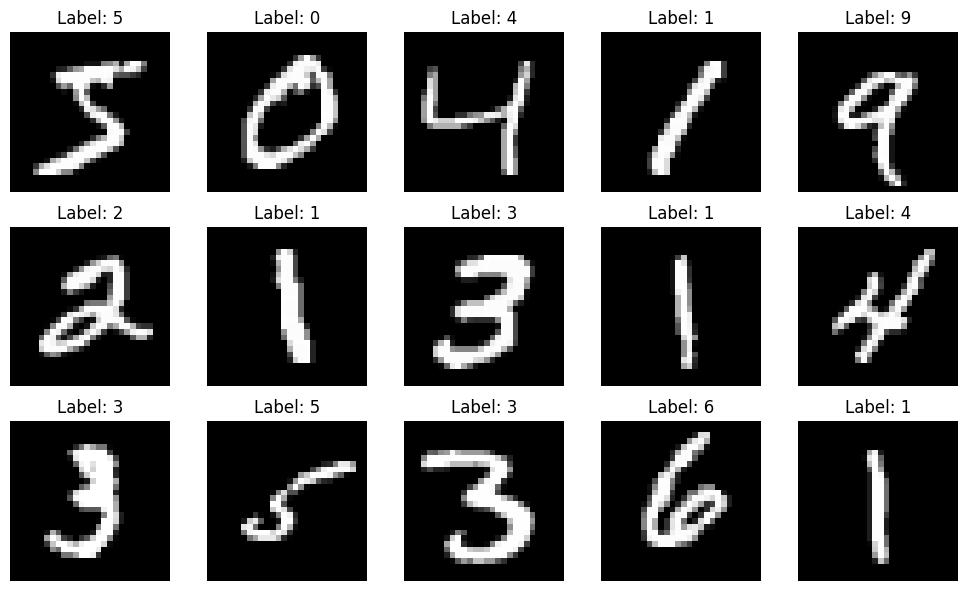

In [10]:
## 3. Visualize Sample Images
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
## 4. Build CNN Model
def build_model():
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Classifier
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,098 (1.79 MB)

 Trainable params: 468,458 (1.79 MB)

 Non-trainable params: 640 (2.50 KB)

In [12]:
## 5. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Random rotation between -10 and +10 degrees
    zoom_range=0.1,        # Random zoom between 90-110%
    width_shift_range=0.1, # Random horizontal shift
    height_shift_range=0.1 # Random vertical shift
)

# Fit the data generator to our training data
datagen.fit(X_train)

In [13]:
## 6. Train the Model
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]
# Train with data augmentation
batch_size = 128
epochs = 10

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks,
                    verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 343s 721ms/step - accuracy: 0.7792 - loss: 0.7301 - val_accuracy: 0.7926 - val_loss: 0.5700 - learning_rate: 0.0010
Epoch 2/10
  1/468 ━━━━━━━━━━━━━━━━━━━━ 4:34 589ms/step - accuracy: 0.9453 - loss: 0.1333

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9453 - loss: 0.1333 - val_accuracy: 0.7905 - val_loss: 0.5757 - learning_rate: 0.0010
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 346s 690ms/step - accuracy: 0.9621 - loss: 0.1237 - val_accuracy: 0.9896 - val_loss: 0.0289 - learning_rate: 0.0010
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9609 - loss: 0.1097 - val_accuracy: 0.9895 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 310s 661ms/step - accuracy: 0.9729 - loss: 0.0911 - val_accuracy: 0.9856 - val_loss: 0.0441 - learning_rate: 0.0010
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9922 - loss: 0.0667 - val_accuracy: 0.9855 - val_loss: 0.0455 - learning_rate: 0.0010
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 371s 683ms/step - accuracy: 0.9794 - loss: 0.0676 - val_accuracy: 0.9934 - val_loss: 0.0178 - learning_rate: 2.0000e-04
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9766 - lo


Test Accuracy: 0.9949


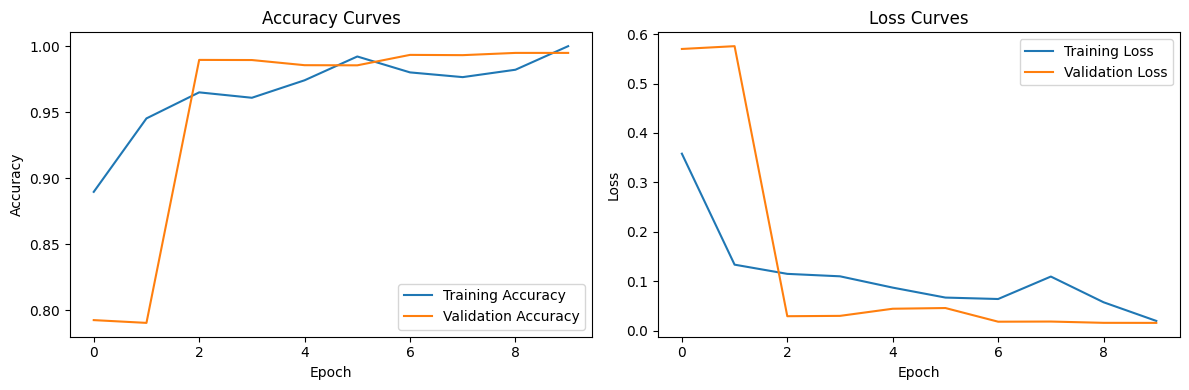

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      1.00      1.00       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



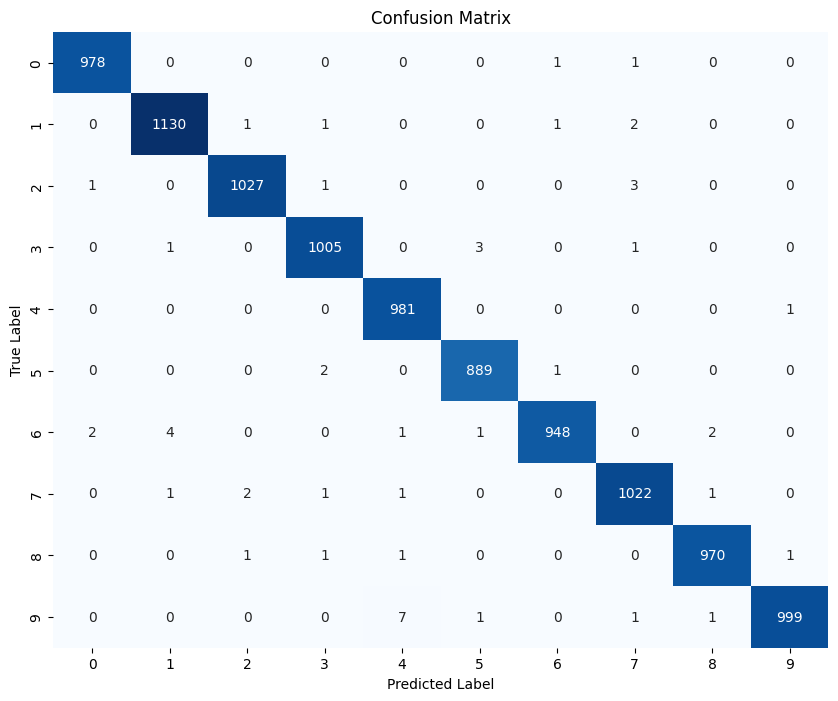

In [14]:
## 7. Evaluate Model Performance
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


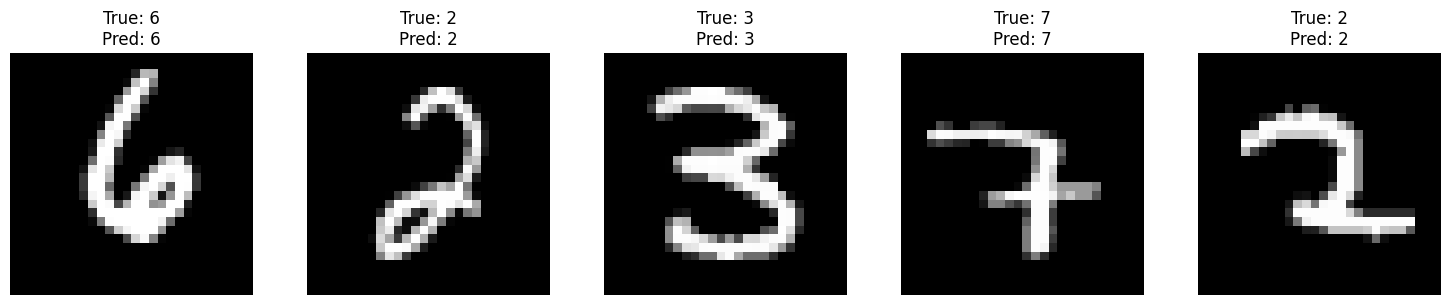

In [16]:
## 8. Make Predictions on Random Test Samples
# Select 5 random test samples
random_indices = np.random.choice(len(X_test), 5, replace=False)
sample_images = X_test[random_indices]
sample_labels = y_true[random_indices]

# Make predictions
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Display results
plt.figure(figsize=(15, 3))
for i, (img, true_label, pred_label) in enumerate(zip(sample_images, sample_labels, predicted_classes)):
    plt.subplot(1, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
## 9. Save the Model
model.save('mnist_cnn.keras')
print("Model saved as mnist_cnn.keras")



Model saved as mnist_cnn.keras
